In [1]:
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import missingno as msno
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

np.random.seed(1)

In [2]:
train_df = pd.read_csv('loan_sanction_train.csv')
test_df = pd.read_csv('loan_sanction_test.csv')

In [3]:
train_df.shape

(614, 13)

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.drop('Loan_ID', inplace=True, axis=1)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<AxesSubplot:>

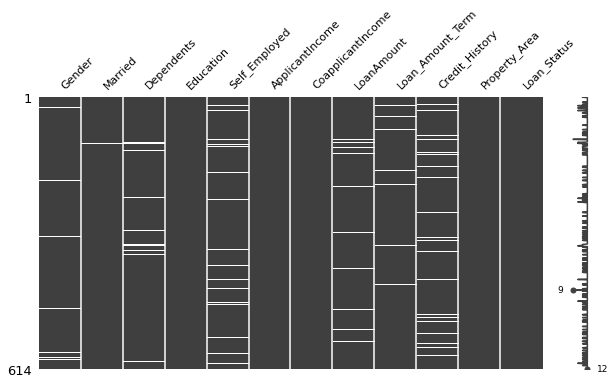

In [7]:
# Plot a matrix chart, set chart and font size
msno.matrix(train_df, figsize=(10,5), fontsize=11)

In [8]:
train_df.Loan_Status = train_df.Loan_Status.astype(str).str.replace('Y', '1', regex=False)
train_df.Loan_Status = train_df.Loan_Status.astype(str).str.replace('N', '0', regex=False)
train_df.Loan_Status = pd.to_numeric(train_df.Loan_Status)

In [9]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [11]:
dfSummary(train_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Gender[object],1. Male2. Female3. nan,489 (79.6%)112 (18.2%)13 (2.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAAAwCAYAAAAfHSRCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA30lEQVR4nO3asQ3CMBBAURxRXmulyFRM4Nk8AVNRkNq9qYAirR300X8DnCJ96QpfUu/9IqaUc75FxPrrD/lnrbXnvu/30XOvEbGWUh6jB+ur1rrNmLvMGKpzGA/MeGDGAzMemPHAjAdmPDDjgRkPzHhgPkyfYNbDdPIkxOXaBBu+NmetCB0Nv+fNul3pyLUJZjww44EZD8x4YMYDMx6Y8cCMB2Y8MOOB+TAN5j0PzLUJ9lmbrjue5X3P8z8WHtcmmPHAjAdmPDDjgRkPzHhgxgMzHpjxwIwH5sM0mPc8sBdawUcrmWxqLgAAAABJRU5ErkJggg=="">",13(2.1%)
2,Married[object],1. Yes2. No3. nan,398 (64.8%)213 (34.7%)3 (0.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAAAwCAYAAAAfHSRCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA5klEQVR4nO3ZsQnDMBBAUSm4VCtceCpPoNk0QaZKYdfqnQUSDG50H/6b4ODDCXT5uq4kplxr3Usp6+xBohpjHOd5vmfP8ctSSllba5/Zg0TVe99mz/DPa/YAes54YMYDMx6Y8cCMB2Y8MOOBGQ/MeGDGA/Nj+kbkj+nsSYjLtQkWem1GXlkRhL7nRb6lReDaBDMemPHAjAdmPDDjgRkPzHhgxgMzHpjxwPyYBvOeB+baBMu11j2llFxPPEvU9073XJtgxgMzHpjxwIwHZjww44EZD8x4YMYDMx7YMsY4Zg+hZ7zngX0BM2I8u5q5sIAAAAAASUVORK5CYII="">",3(0.5%)
3,Dependents[object],1. 02. 13. 24. 3+5. nan,345 (56.2%)102 (16.6%)101 (16.4%)51 (8.3%)15 (2.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAABRCAYAAADctfi9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABPklEQVR4nO3ZsWnDUBhG0TikVCtcZKpMoNk0QaZKEdXqldqdcYSfL5wzwYMLX/H+y3EcbzS9j34AjxMv7DLP89c0TdfRDxlh3/ffbdu+R7/jUR/TNF2XZfkZ/ZAR1nX9HP2G/zCbYeKFiRcmXph4YeKFiRcmXph4YeKFiRfmYzr8MX1xjO0ym2GnzmZ9hmpOvefV72M1ZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDB/m2FOQmFmM+y02TSZz3faScg56PnMZph4YeKFiRcmXph4YeKFiRcmXph4Yf42w5yEwsxm2F2zaRJf010nIeee12Q2w8QLEy9MvDDxwsQLEy9MvDDxwsQLEy/Mx3SYe16Y2Qy7mU3z2HJzz3O3azGbYeKFiRcmXph4YeKFiRcmXph4YeKF+dsMcxIKM5th4oX9Af5Ud5SGMq6DAAAAAElFTkSuQmCC"">",15(2.4%)
4,Education[object],1. Graduate2. Not Graduate,480 (78.2%)134 (21.8%),,0(0.0%)
5,Self_Employed[object],1. No2. Yes3. nan,500 (81.4%)82 (13.4%)32 (5.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAAAwCAYAAAAfHSRCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA30lEQVR4nO3ZsQ3CMBBAUYwo3VopMhUTeDZPwFQUpHZvJnAR5RTyxX8DnCx96QpfGmPcxJRKKc+c8/Lrh/yD3vtn27ZX1LxHznmptb6jBmqutbZGzrtHDtO5jAdmPDDjgRkPzHhgxgMzHpjxwIwHZjwwP6ZPFP0xnTwJcbk2wQ6tzeg1oH0O3fOi71Pax7UJZjww44EZD8x4YMYDMx6Y8cCMB2Y8MOOB+TEN5j0PzLUJNl2brsTrm97zvNVdn2sTzHhgxgMzHpjxwIwHZjww44EZD8x4YMYD82MazHse2BcaRkjwTeG1RgAAAABJRU5ErkJggg=="">",32(5.2%)
6,ApplicantIncome[int64],Mean (sd) : 5403.5 (6109.0)min < med < max:150.0 < 3812.5 < 81000.0IQR (CV) : 2917.5 (0.9),505 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA70lEQVR4nO3cMQrCMBhAYRWhS1zTwS0n8CqeoKvX6gk8lYOZu3SqJwi0EI30vW9tCT88SLb/uCzLQft3aj2AfuNc+hBjvIcQ+jWHTNP0zjk/642l2oqhQwj9MAyvNYeM43itN5K+wasbwtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBqiuDlwi3mebymlx5p/XSfZRpXQXdddXCf537y6IQwNUeXq3sL3vI0Pa9op/kAuuRgAAAAASUVORK5CYII="">",0(0.0%)
7,CoapplicantIncome[float64],Mean (sd) : 1621.2 (2926.2)min < med < max:0.0 < 1188.5 < 41667.0IQR (CV) : 2297.2 (0.6),287 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA6UlEQVR4nO3csQkCMRhAYRUhTWxzhd1N4CpOcK1r3QROZWHqa1KdEwQiRE9872sTwg8PUv77dV13+n+HrQfQdxxrBymla4xxaHlkWZZnzvnebyz1Vg0dYxymaXq0PDLP87nfSPoEv24IQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA

In [12]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

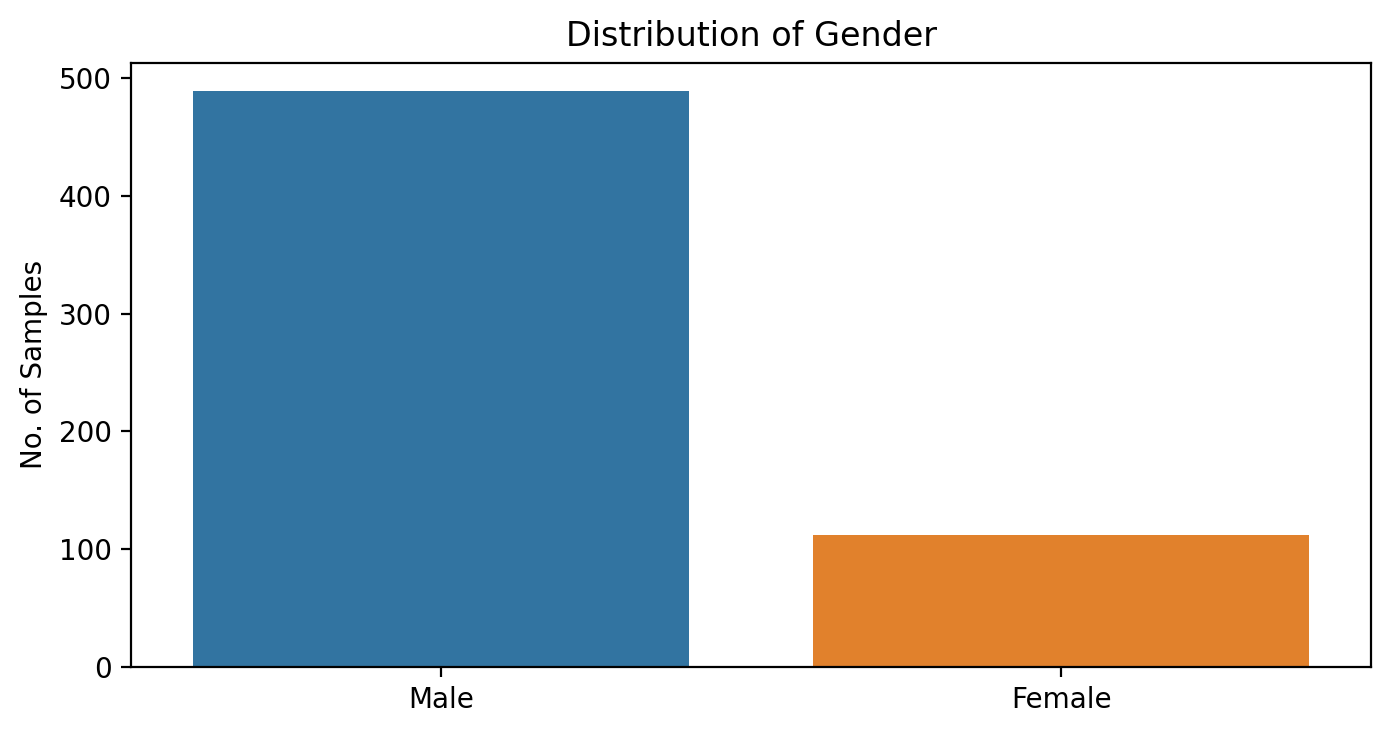

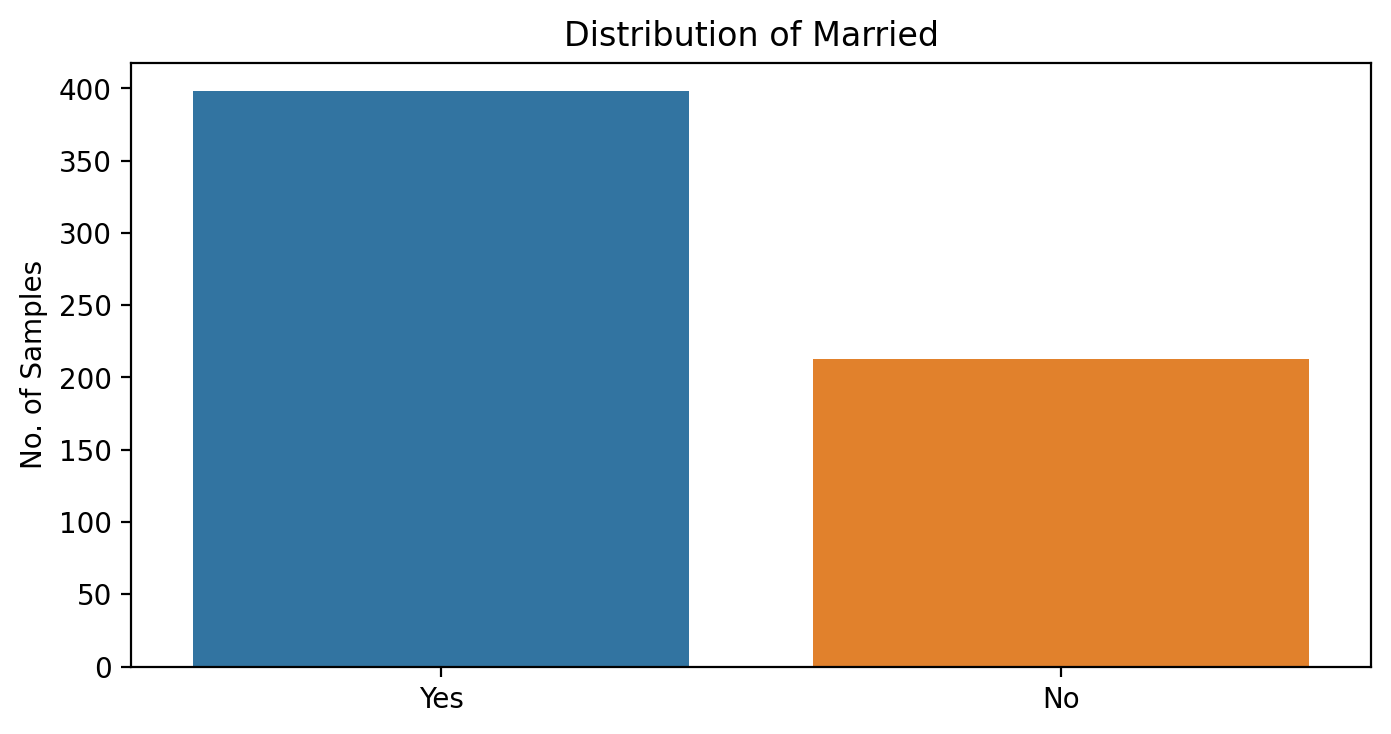

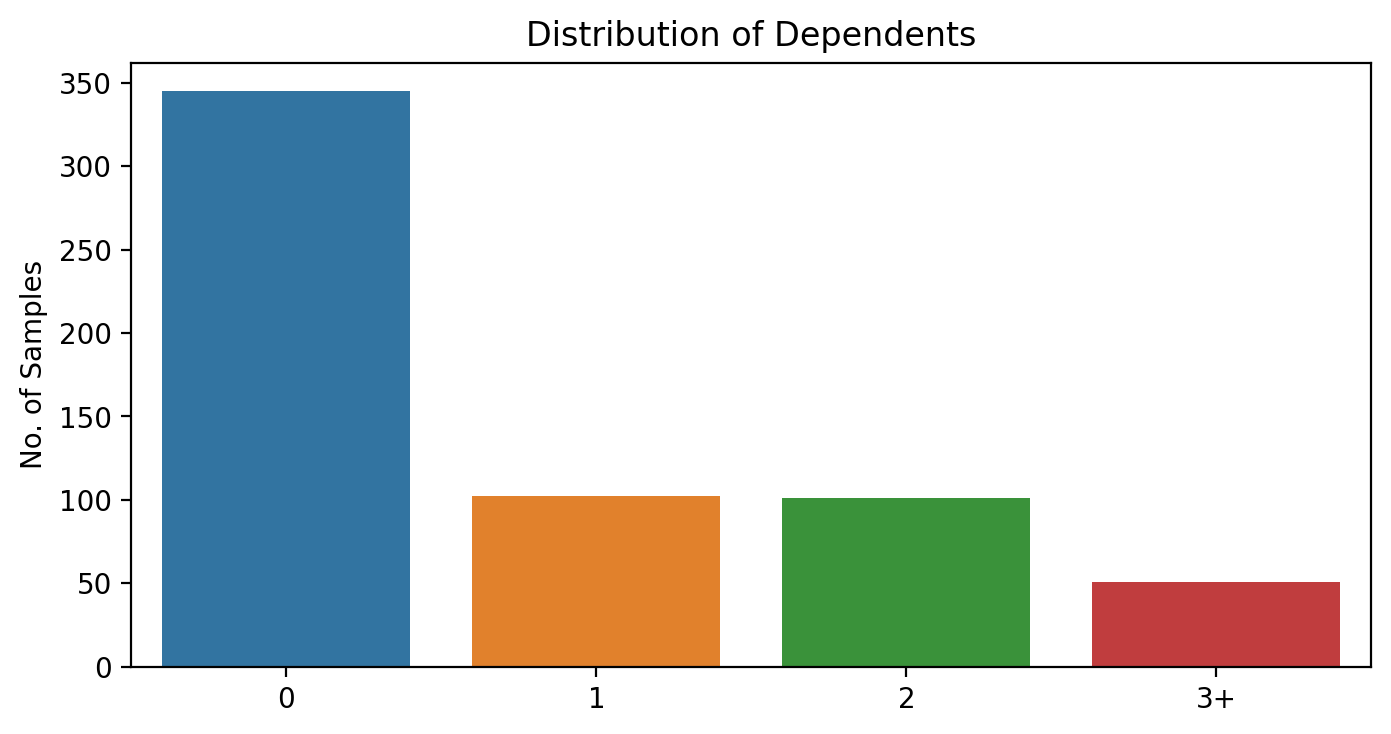

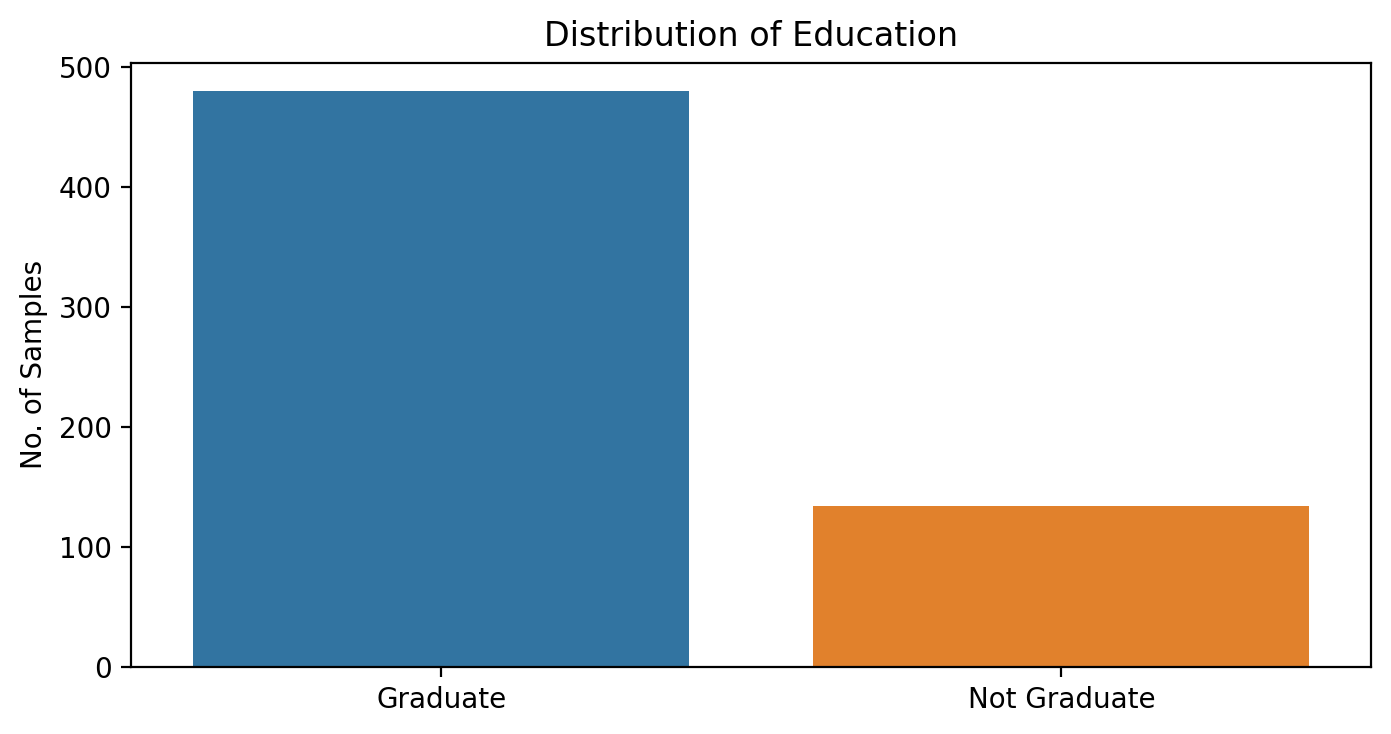

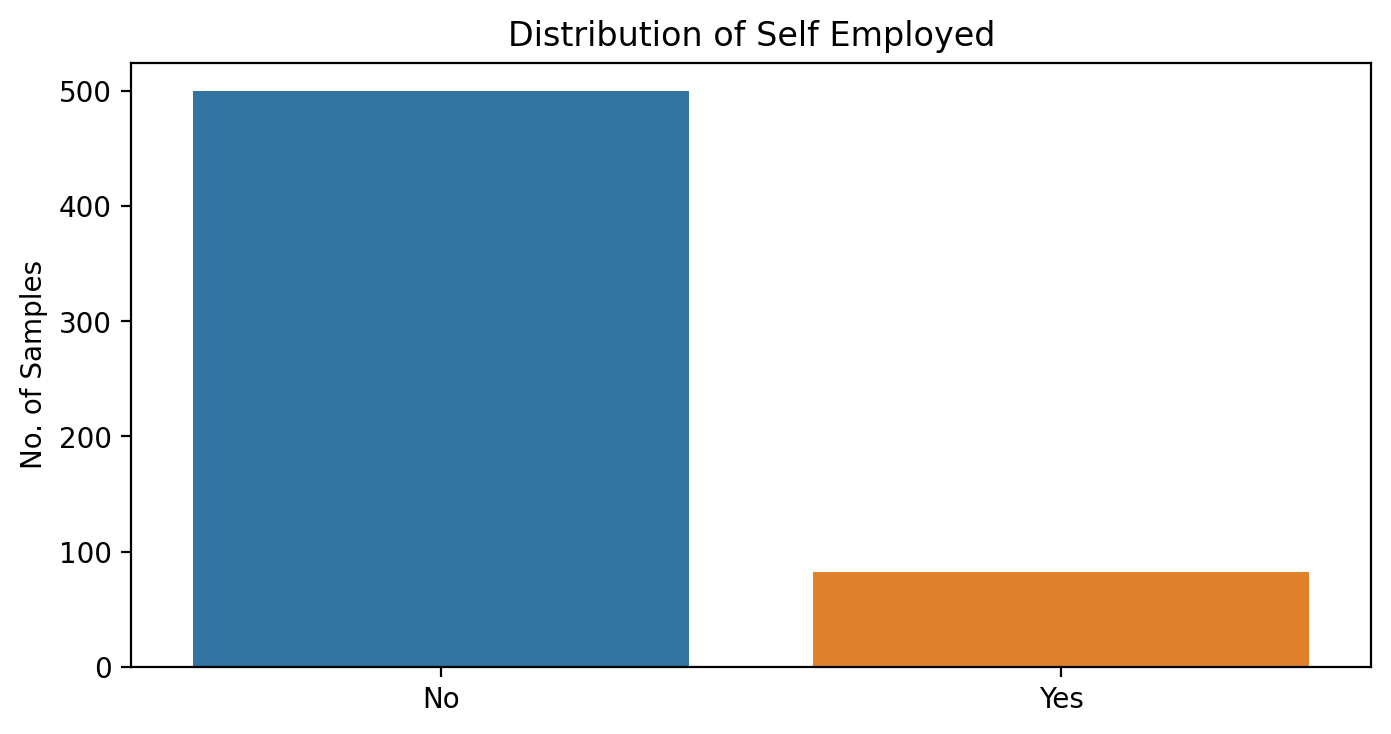

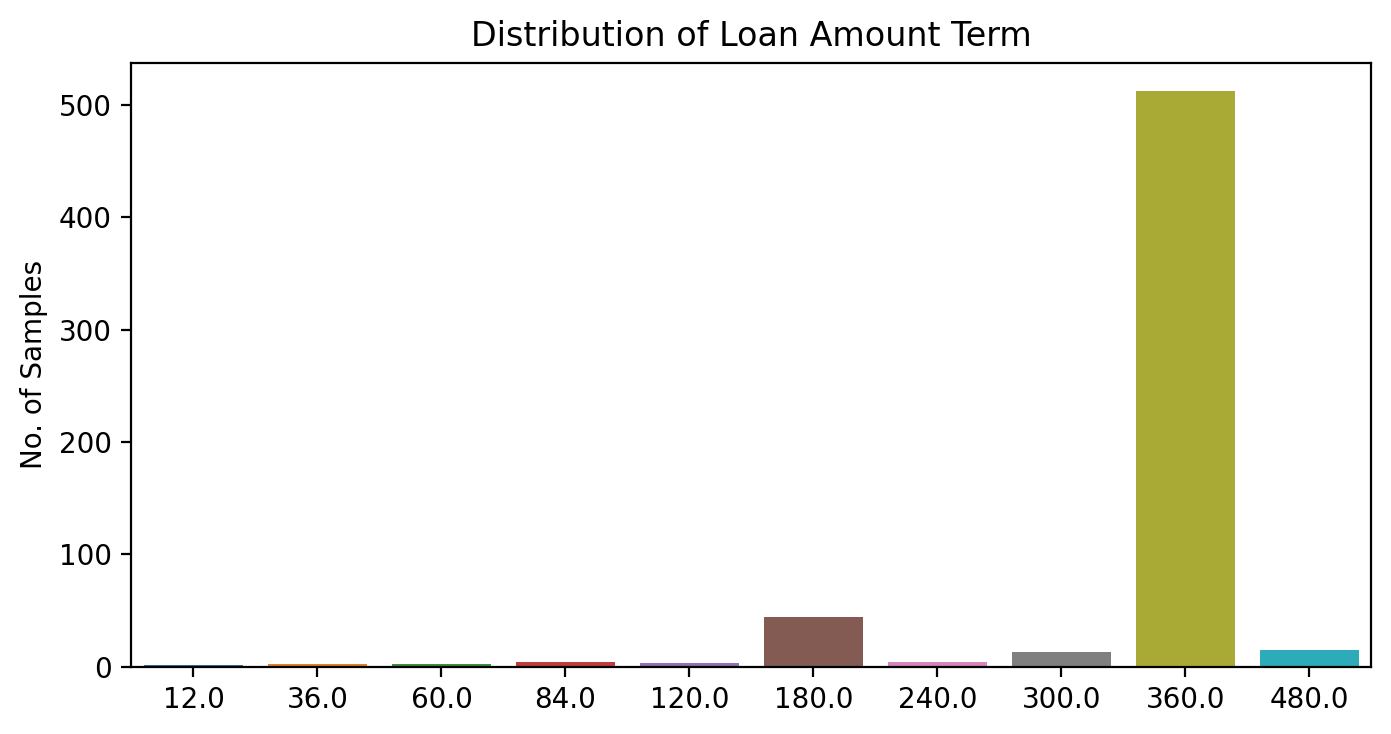

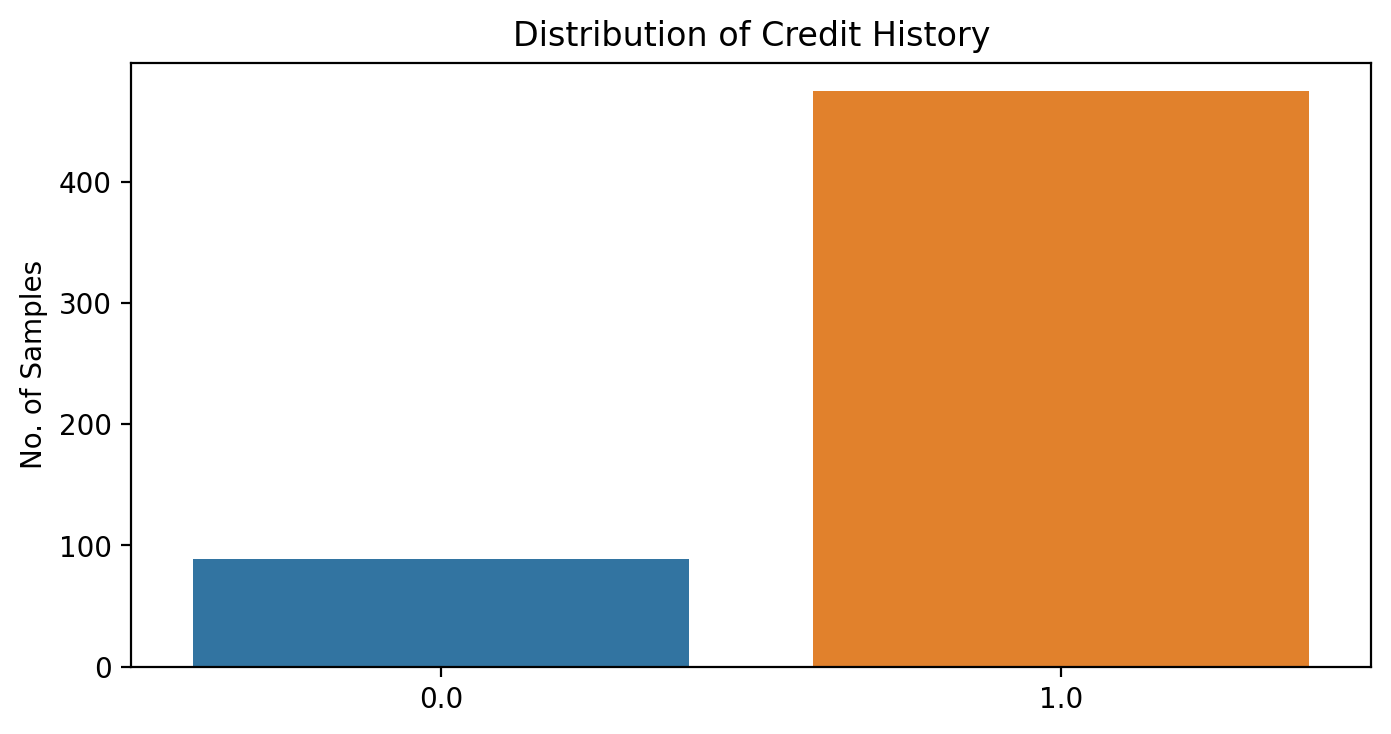

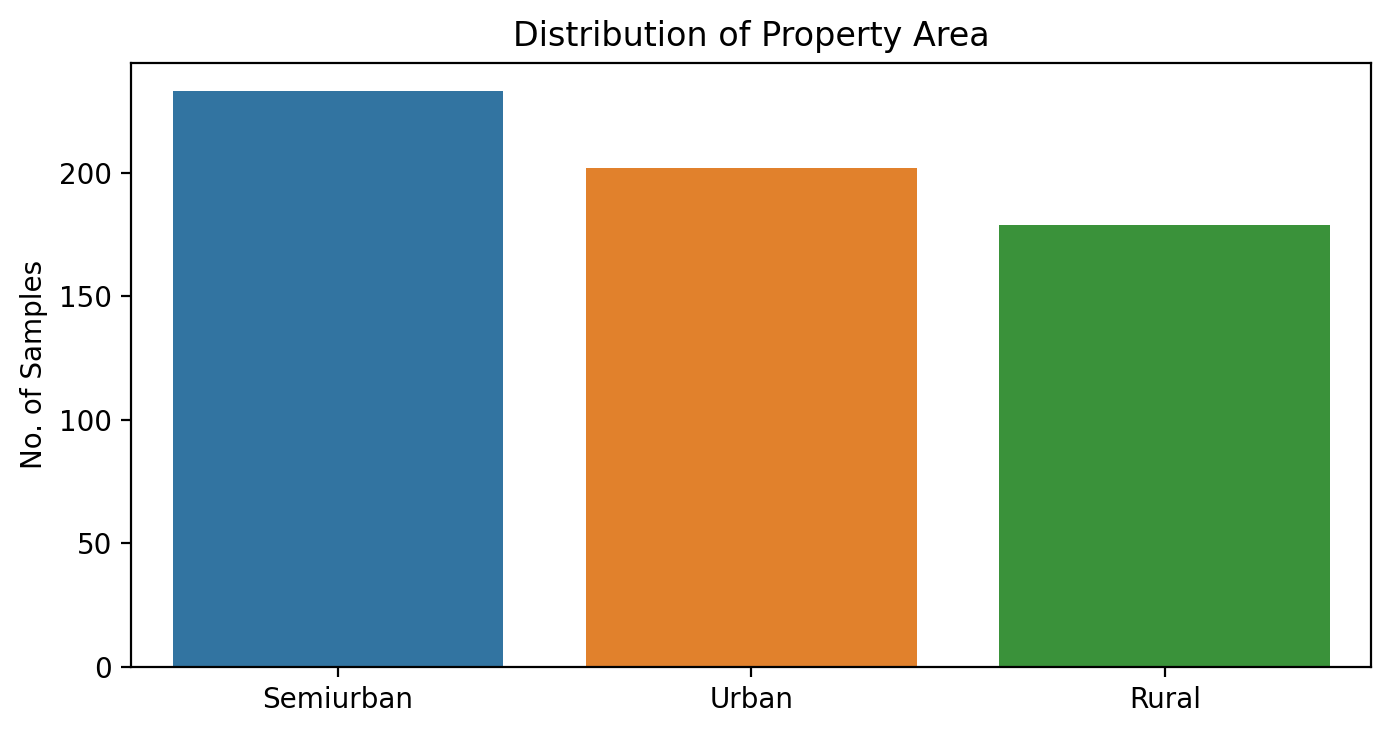

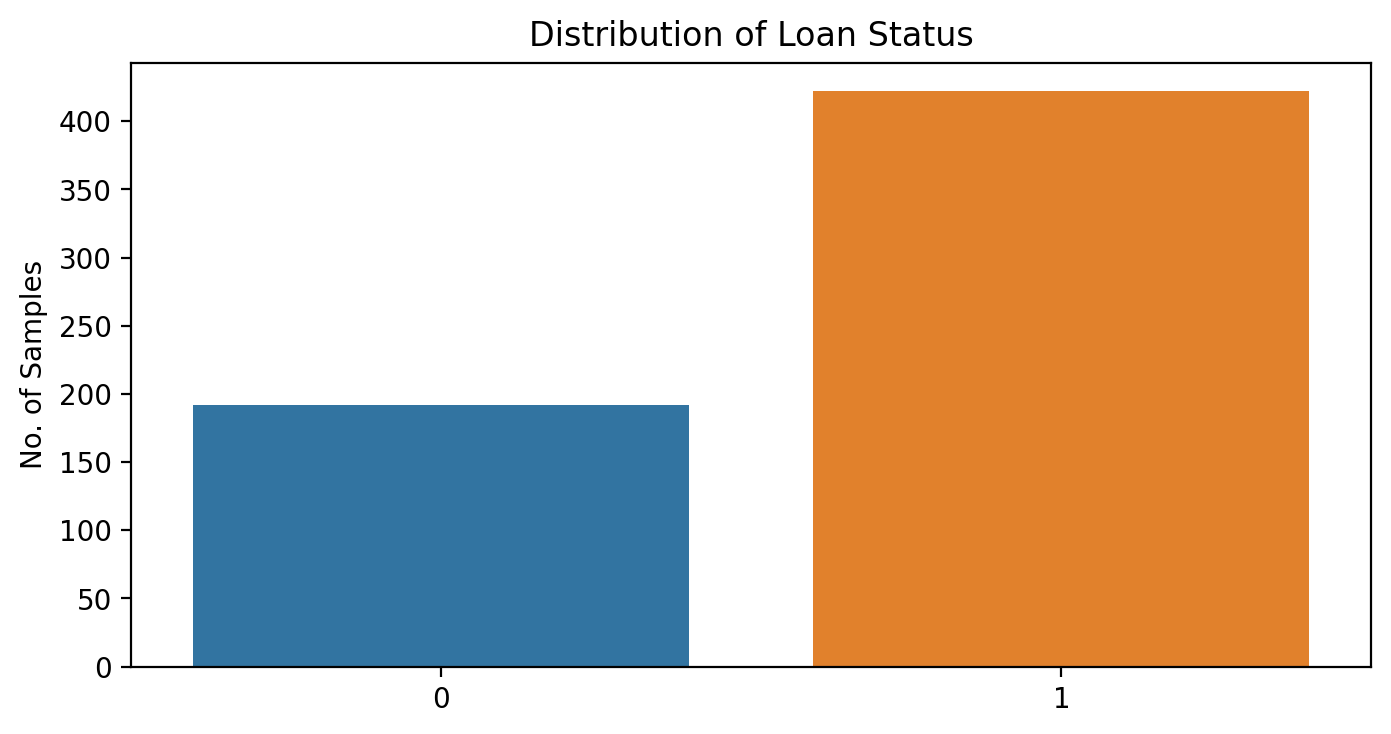

In [13]:
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']:
    plt.figure(figsize=(8, 4), dpi=200)
    sns.barplot(data=train_df,
                 x=train_df[col].value_counts().index.values,
                y=train_df[col].value_counts())
    plt.ylabel('No. of Samples')
    plt.title(f'Distribution of {col.replace("_", " ")}')
    plt.show()

In [14]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train_df.Credit_History = train_df.Credit_History.astype(str).str.replace('1.0', 'Yes', regex=False)
train_df.Credit_History = train_df.Credit_History.astype(str).str.replace('0.0', 'No', regex=False)
train_df.Credit_History = train_df.Credit_History.astype(str).str.replace('nan', 'Unknown', regex=False)

In [16]:
train_df.Credit_History.value_counts()

Yes        475
No          89
Unknown     50
Name: Credit_History, dtype: int64

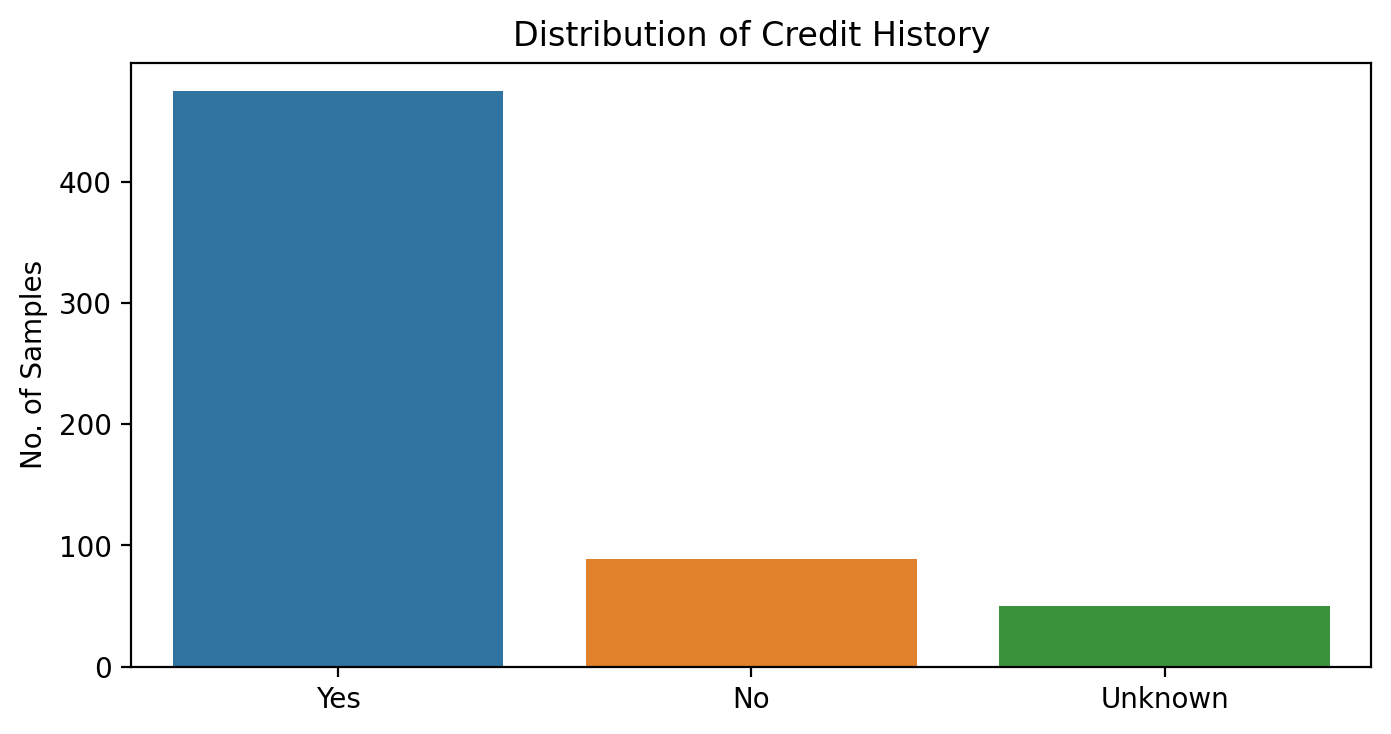

In [17]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(data=train_df,
             x=train_df.Credit_History.value_counts().index.values,
            y=train_df.Credit_History.value_counts())
plt.ylabel('No. of Samples')
plt.title(f'Distribution of Credit History')
plt.show()

In [18]:
train_df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
train_df.Self_Employed = train_df.Self_Employed.astype(str).str.replace('nan', 'Unknown', regex=False)

In [20]:
train_df.Self_Employed.value_counts()

No         500
Yes         82
Unknown     32
Name: Self_Employed, dtype: int64

In [21]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train_df.LoanAmount.fillna(train_df.LoanAmount.mean(), inplace=True)

In [23]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train_df.LoanAmount.describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [25]:
bins = [-1, 25, 75, 100, 150, 250, 500, np.inf]
labels=['<25','25-75', '75-100', '100-150', '150-250', '250-500','>500']
train_df_LoanAmount = train_df.groupby(pd.cut(train_df.LoanAmount, bins=bins, labels=labels)).size().reset_index(name='Count')
print(train_df_LoanAmount)

  LoanAmount  Count
0        <25      4
1      25-75     65
2     75-100     85
3    100-150    260
4    150-250    148
5    250-500     47
6       >500      5


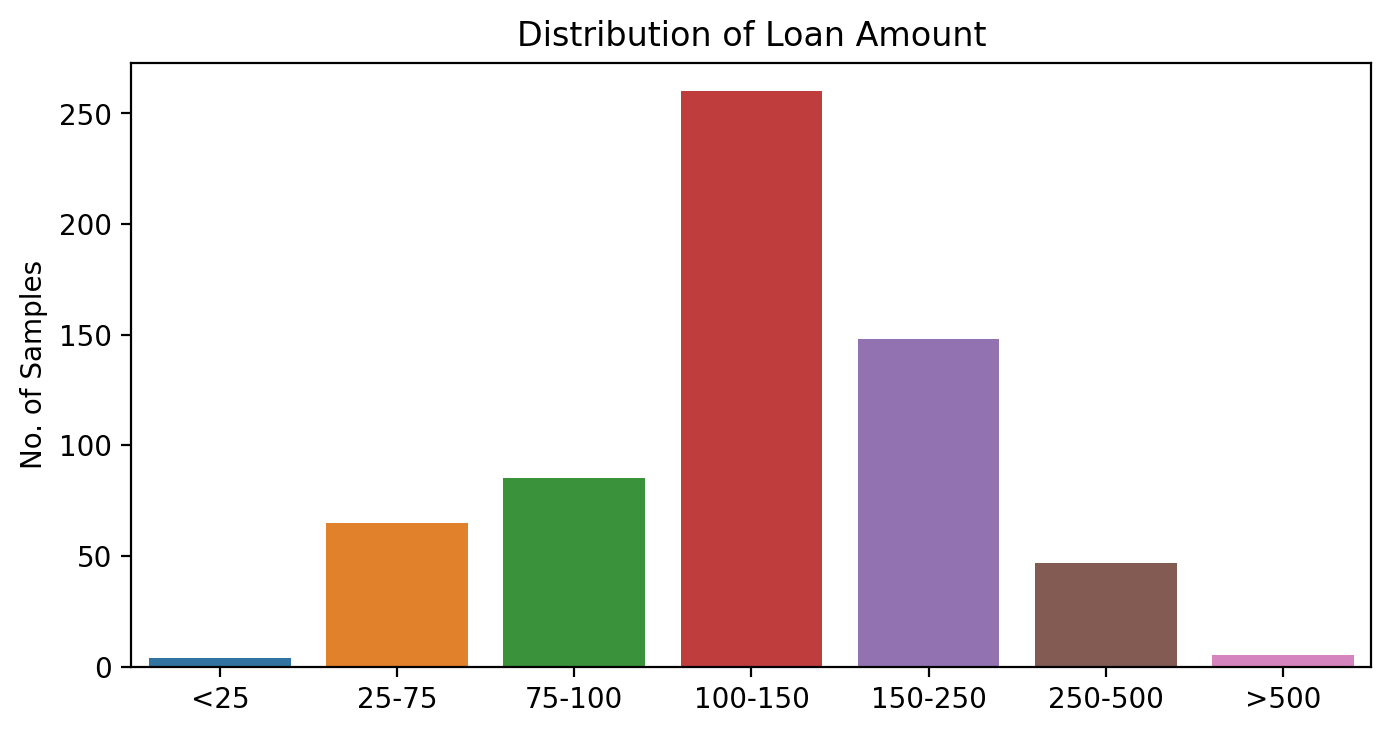

In [26]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(data=train_df_LoanAmount,
             x=train_df_LoanAmount.LoanAmount.values,
             y=train_df_LoanAmount.Count.values)
plt.ylabel('No. of Samples')
plt.title(f'Distribution of Loan Amount')
plt.show()

In [27]:
acceptance_rate = []
count_la = []
for segment in labels:
    if '-' in segment:
        min_range = int(segment.split('-')[0])
        max_range = int(segment.split('-')[1])
        acceptance_rate.append(train_df[(train_df.LoanAmount>= min_range) & (train_df.LoanAmount < max_range)][['Loan_Status']].mean()[0]*100)
        count_la.append(train_df[(train_df.LoanAmount>= min_range) & (train_df.LoanAmount < max_range)][['Loan_Status']].count()[0])
    else:
        range_num = int(segment[1:])
        if '<' in segment:
            acceptance_rate.append(train_df[(train_df.LoanAmount < range_num)][['Loan_Status']].mean()[0]*100)
            count_la.append(train_df[(train_df.LoanAmount < range_num)][['Loan_Status']].count()[0])
        else:
            acceptance_rate.append(train_df[(train_df.LoanAmount >= range_num)][['Loan_Status']].mean()[0]*100)
            count_la.append(train_df[(train_df.LoanAmount >= range_num)][['Loan_Status']].count()[0])

In [28]:
loan_amount_df = pd.DataFrame(data=list(zip(count_la, acceptance_rate)), index=labels)
loan_amount_df

,0,1
<25,2,50.000000
25-75,64,70.312500
75-100,73,68.493151
100-150,268,71.268657
150-250,154,66.233766
250-500,47,61.702128
>500,6,66.666667


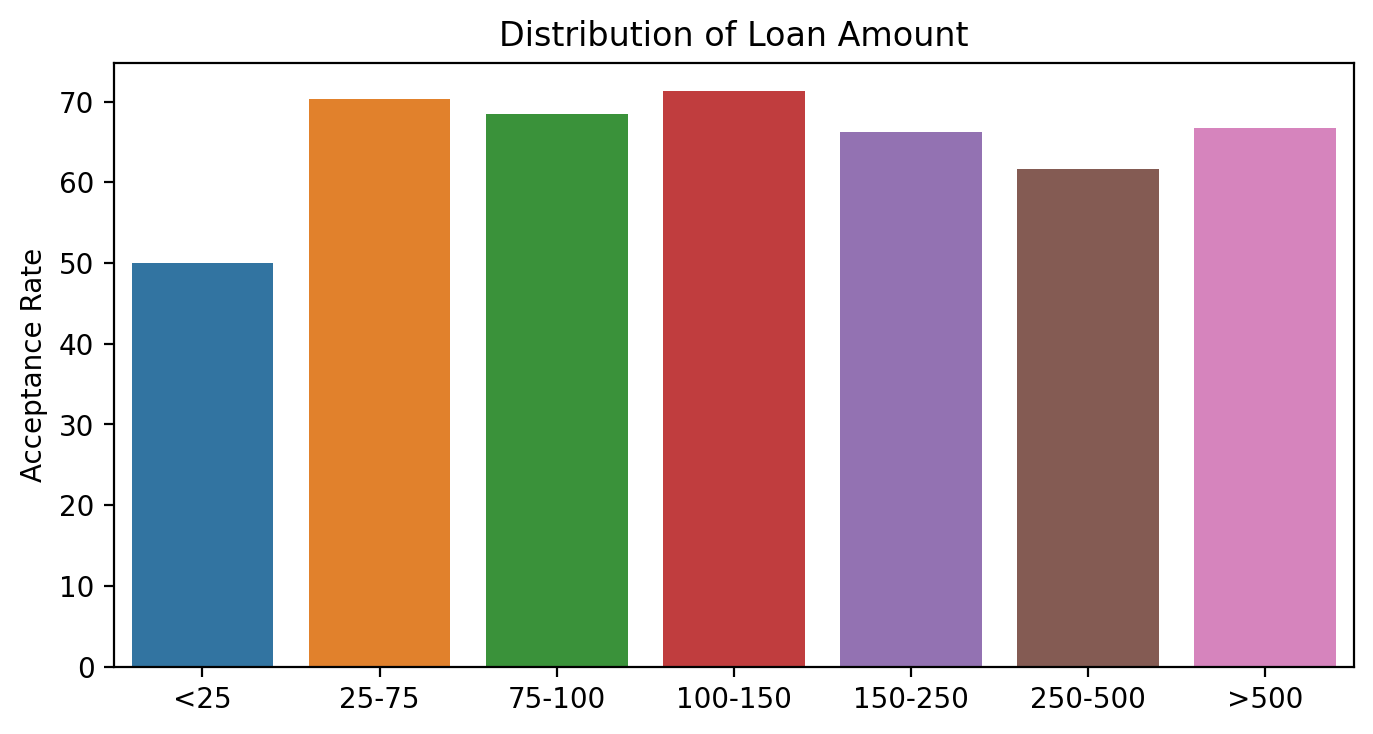

In [29]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(data=loan_amount_df,
             x=loan_amount_df.index,
             y=loan_amount_df[1])
plt.ylabel('Acceptance Rate')
plt.title('Distribution of Loan Amount')
plt.show()

In [30]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train_df.Loan_Amount_Term.fillna(train_df.Loan_Amount_Term.mode()[0], inplace=True)

In [32]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train_df_Loan_Amount_Term = pd.DataFrame(train_df.groupby('Loan_Amount_Term')['Loan_Status'].mean()*100)
train_df_Loan_Amount_Term

,Loan_Status
Loan_Amount_Term,
12.0,100.000000
36.0,0.000000
60.0,100.000000
84.0,75.000000
120.0,100.000000
180.0,65.909091
240.0,75.000000
300.0,61.538462
360.0,69.771863


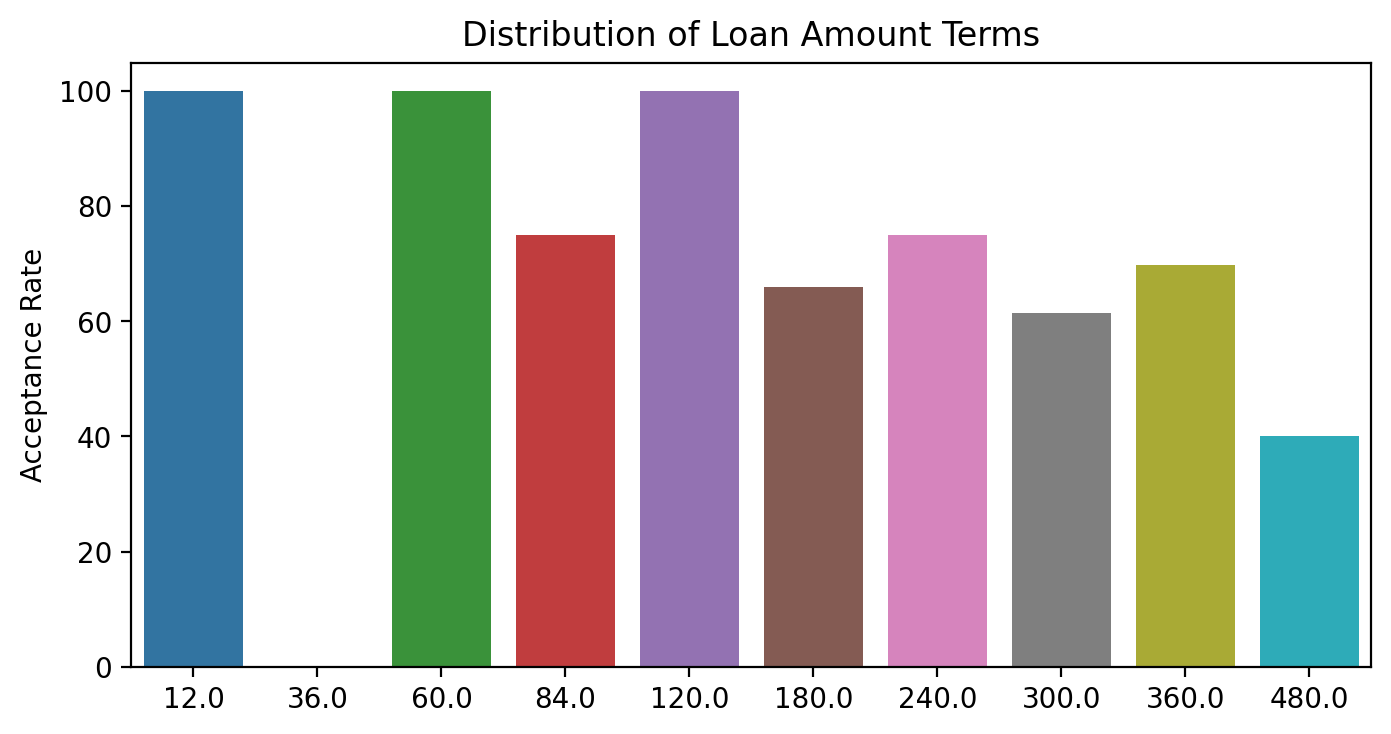

In [34]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.barplot(x=train_df_Loan_Amount_Term.index.values,
             y=train_df_Loan_Amount_Term.Loan_Status.values)
plt.ylabel('Acceptance Rate')
plt.title('Distribution of Loan Amount Terms')
plt.show()

In [35]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
train_df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [37]:
train_df.Dependents.fillna('0', inplace=True)

In [38]:
train_df.Dependents = train_df.Dependents.astype(str).str.replace("3+", '3', regex=False)
train_df.Dependents = pd.to_numeric(train_df.Dependents)

In [39]:
train_df_Dependents = pd.DataFrame(train_df.groupby('Dependents')['Loan_Status'].mean()*100)
train_df_Dependents.insert(train_df_Dependents.shape[1], 'Count', train_df.Dependents.value_counts().values)
train_df_Dependents

,Loan_Status,Count
Dependents,,
0,68.611111,360
1,64.705882,102
2,75.247525,101
3,64.705882,51


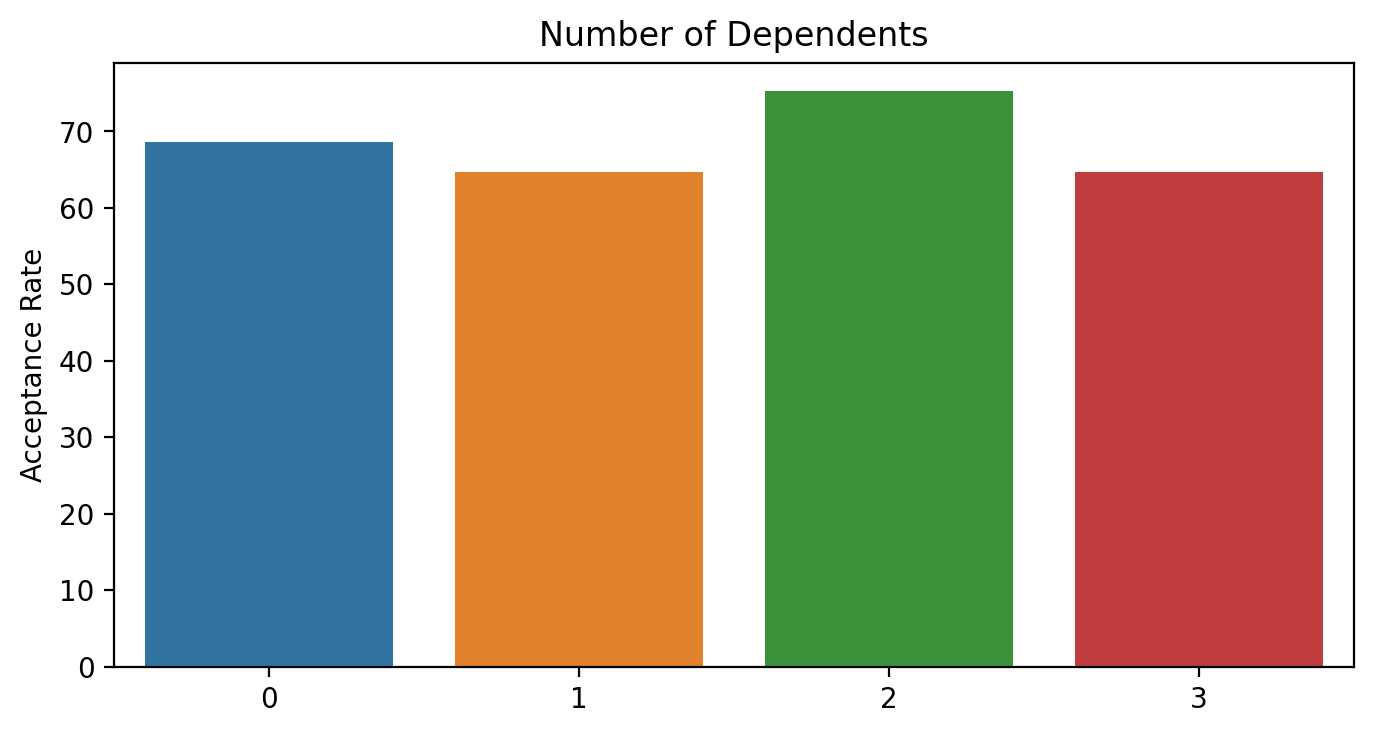

In [40]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.barplot(x=train_df_Dependents.index.values,
             y=train_df_Dependents.Loan_Status.values)
plt.ylabel('Acceptance Rate')
plt.title('Number of Dependents')
plt.show()

In [41]:
train_df.isna().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
train_df.dropna(axis=0, inplace=True)

In [43]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
train_df.Gender.value_counts()

Male      487
Female    111
Name: Gender, dtype: int64

In [45]:
train_df_Gender = pd.DataFrame(train_df.groupby('Gender')['Loan_Status'].mean()*100)
train_df_Gender.insert(train_df_Gender.shape[1], 'Count', train_df.Gender.value_counts().values)
train_df_Gender

,Loan_Status,Count
Gender,,
Female,66.666667,487
Male,69.199179,111


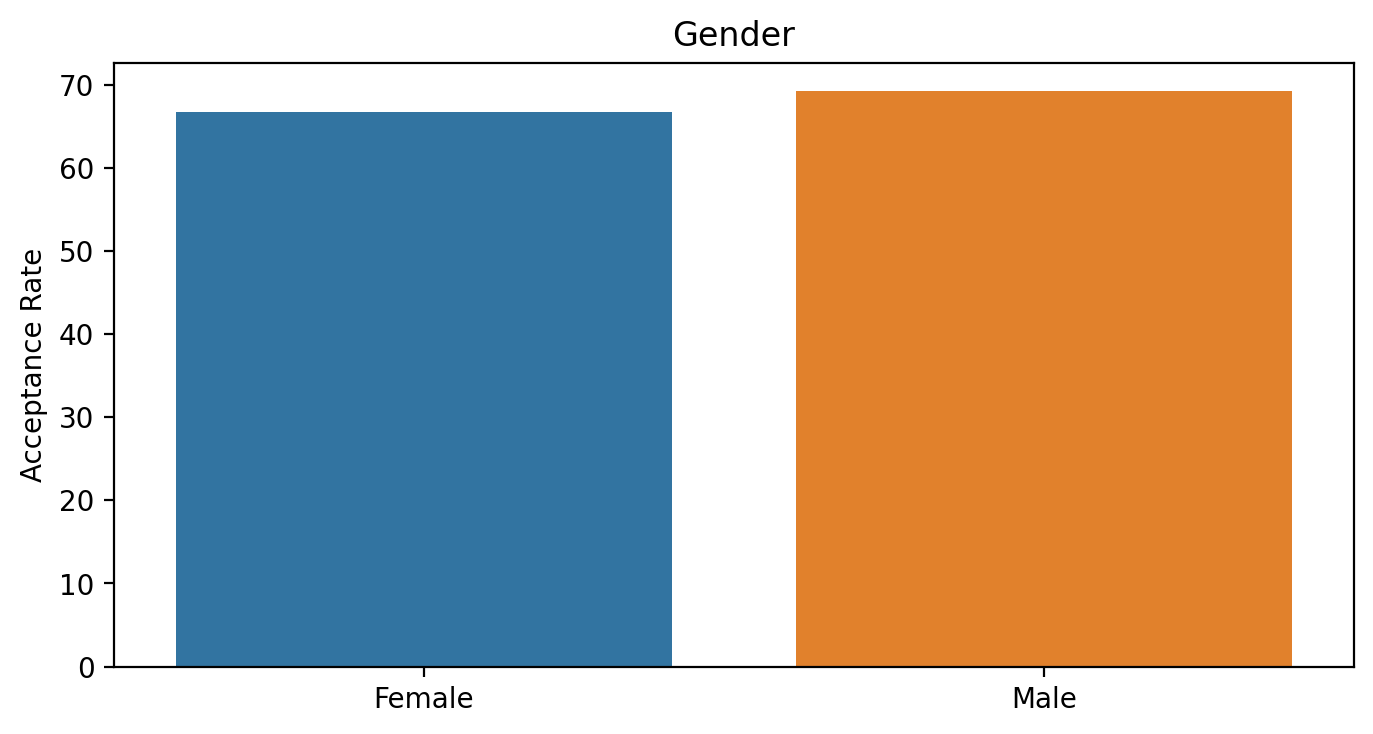

In [46]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.barplot(x=train_df_Gender.index.values,
             y=train_df_Gender.Loan_Status.values)
plt.ylabel('Acceptance Rate')
plt.title('Gender')
plt.show()

In [47]:
train_df.Education.value_counts()

Graduate        465
Not Graduate    133
Name: Education, dtype: int64

In [48]:
train_df_Education = pd.DataFrame(train_df.groupby('Education')['Loan_Status'].mean()*100)
train_df_Education.insert(train_df_Education.shape[1], 'Count', train_df.Education.value_counts().values)
train_df_Education

,Loan_Status,Count
Education,,
Graduate,70.752688,465
Not Graduate,61.654135,133


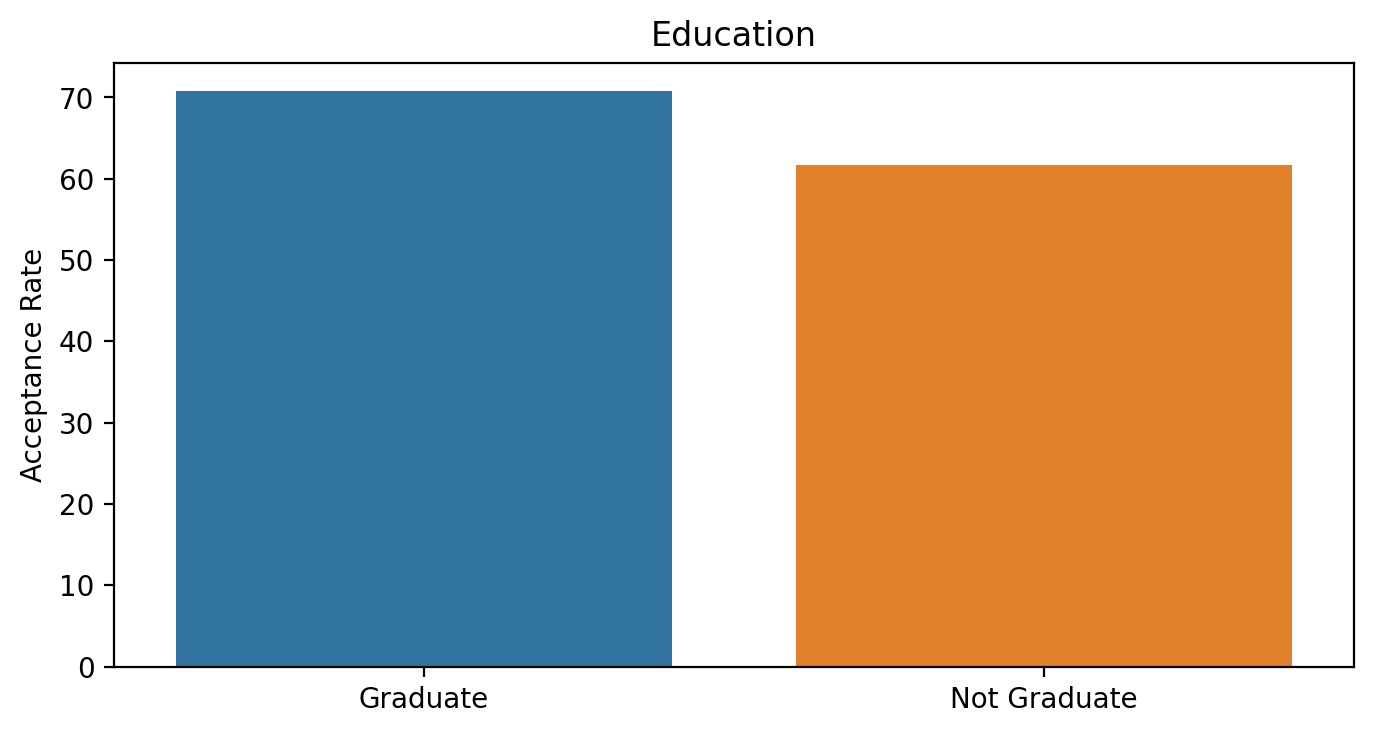

In [49]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.barplot(x=train_df_Education.index.values,
             y=train_df_Education.Loan_Status.values)
plt.ylabel('Acceptance Rate')
plt.title('Education')
plt.show()

In [50]:
train_df.Self_Employed.value_counts()

No         488
Yes         78
Unknown     32
Name: Self_Employed, dtype: int64

In [51]:
train_df_Self_Employed = pd.DataFrame(train_df.groupby('Self_Employed')['Loan_Status'].mean()*100)
train_df_Self_Employed.insert(train_df_Self_Employed.shape[1], 'Count', train_df.Self_Employed.value_counts().values)
train_df_Self_Employed

,Loan_Status,Count
Self_Employed,,
No,68.852459,488
Unknown,71.875000,78
Yes,66.666667,32


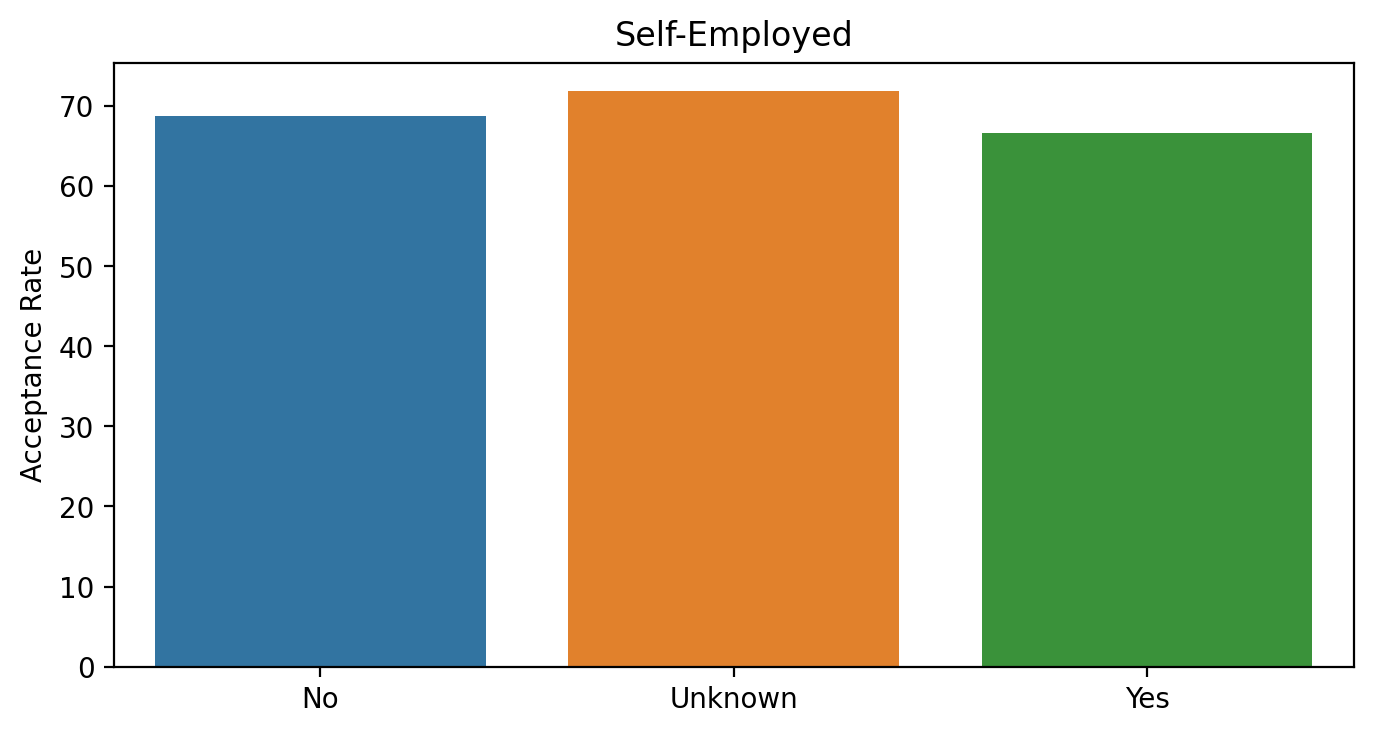

In [52]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.barplot(x=train_df_Self_Employed.index.values,
             y=train_df_Self_Employed.Loan_Status.values)
plt.ylabel('Acceptance Rate')
plt.title('Self-Employed')
plt.show()

In [53]:
train_df.CoapplicantIncome.describe()

count      598.000000
mean      1631.499866
std       2953.315785
min          0.000000
25%          0.000000
50%       1211.500000
75%       2324.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [54]:
bins_CAI = [-1, 1000, 10000, 20000, 30000, np.inf]
labels_CAI=['<1000','1000-10000', '10000-20000', '20000-30000', '>30000']
train_df_CoapplicantIncome = train_df.groupby(pd.cut(train_df.CoapplicantIncome, bins=bins_CAI, labels=labels_CAI)).size().reset_index(name='Count')
print(train_df_CoapplicantIncome)

  CoapplicantIncome  Count
0             <1000    286
1        1000-10000    306
2       10000-20000      4
3       20000-30000      0
4            >30000      2


In [55]:
acceptance_rate_CAI = []
count_CAI = []
for segment in labels_CAI:
    if '-' in segment:
        min_range = int(segment.split('-')[0])
        max_range = int(segment.split('-')[1])
        acceptance_rate_CAI.append(train_df[(train_df.CoapplicantIncome>= min_range) & (train_df.CoapplicantIncome < max_range)][['Loan_Status']].mean()[0]*100)
        count_CAI.append(train_df[(train_df.CoapplicantIncome>= min_range) & (train_df.CoapplicantIncome < max_range)][['Loan_Status']].count()[0])
    else:
        range_num = int(segment[1:])
        if '<' in segment:
            acceptance_rate_CAI.append(train_df[(train_df.CoapplicantIncome < range_num)][['Loan_Status']].mean()[0]*100)
            count_CAI.append(train_df[(train_df.CoapplicantIncome < range_num)][['Loan_Status']].count()[0])
        else:
            acceptance_rate_CAI.append(train_df[(train_df.CoapplicantIncome >= range_num)][['Loan_Status']].mean()[0]*100)
            count_CAI.append(train_df[(train_df.CoapplicantIncome >= range_num)][['Loan_Status']].count()[0])

In [56]:
CAI_df = pd.DataFrame(data=list(zip(acceptance_rate_CAI, count_CAI)), index=labels_CAI, columns=['Acceptance Rate', 'Count'])
CAI_df

,Acceptance Rate,Count
<1000,65.964912,285
1000-10000,72.312704,307
10000-20000,0.000000,2
20000-30000,50.000000,2
>30000,0.000000,2


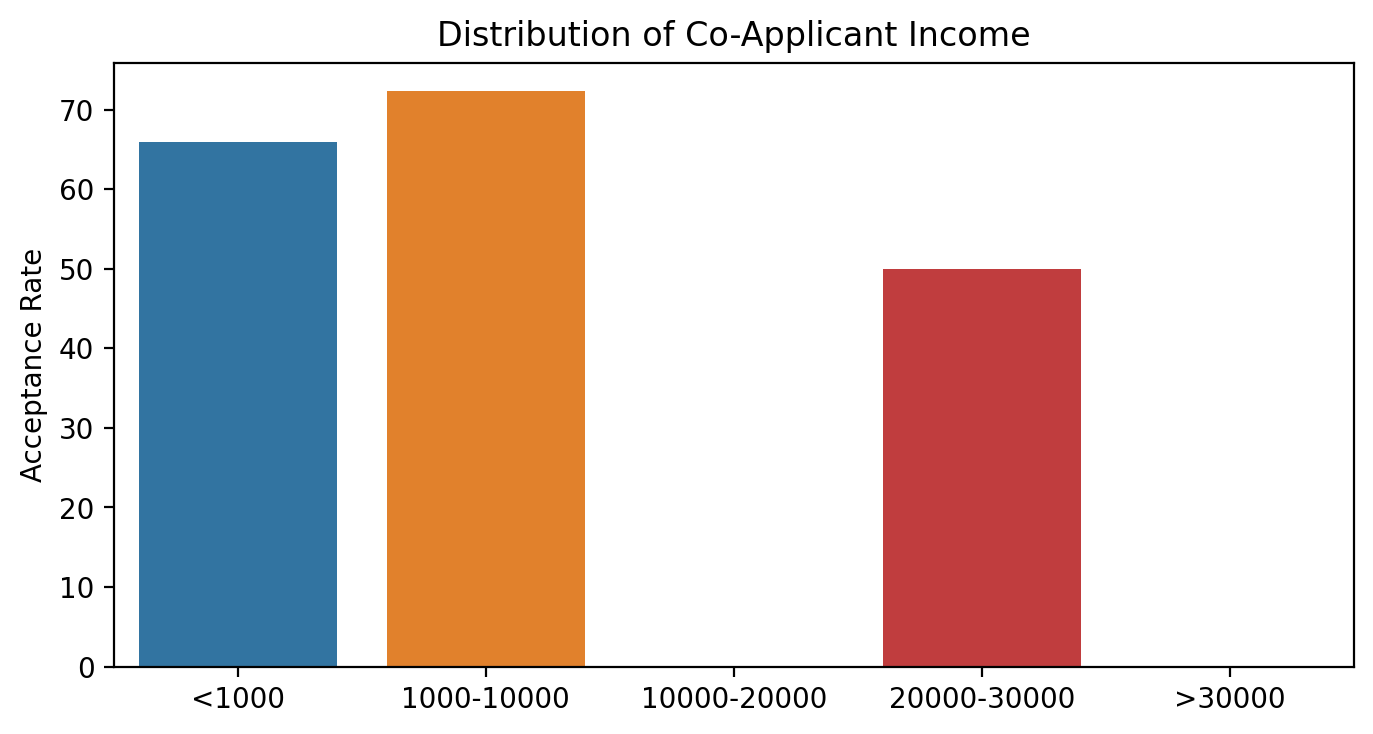

In [57]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(data=CAI_df,
             x=CAI_df.index,
             y='Acceptance Rate')
plt.ylabel('Acceptance Rate')
plt.title('Distribution of Co-Applicant Income')
plt.show()

In [58]:
train_df.Credit_History.value_counts()

Yes        463
No          86
Unknown     49
Name: Credit_History, dtype: int64

In [59]:
train_df_Credit_History = pd.DataFrame(train_df.groupby('Credit_History')['Loan_Status'].mean()*100)
train_df_Credit_History.insert(train_df_Credit_History.shape[1], 'Count', train_df.Credit_History.value_counts().values)
train_df_Credit_History

,Loan_Status,Count
Credit_History,,
No,8.139535,463
Unknown,73.469388,86
Yes,79.481641,49


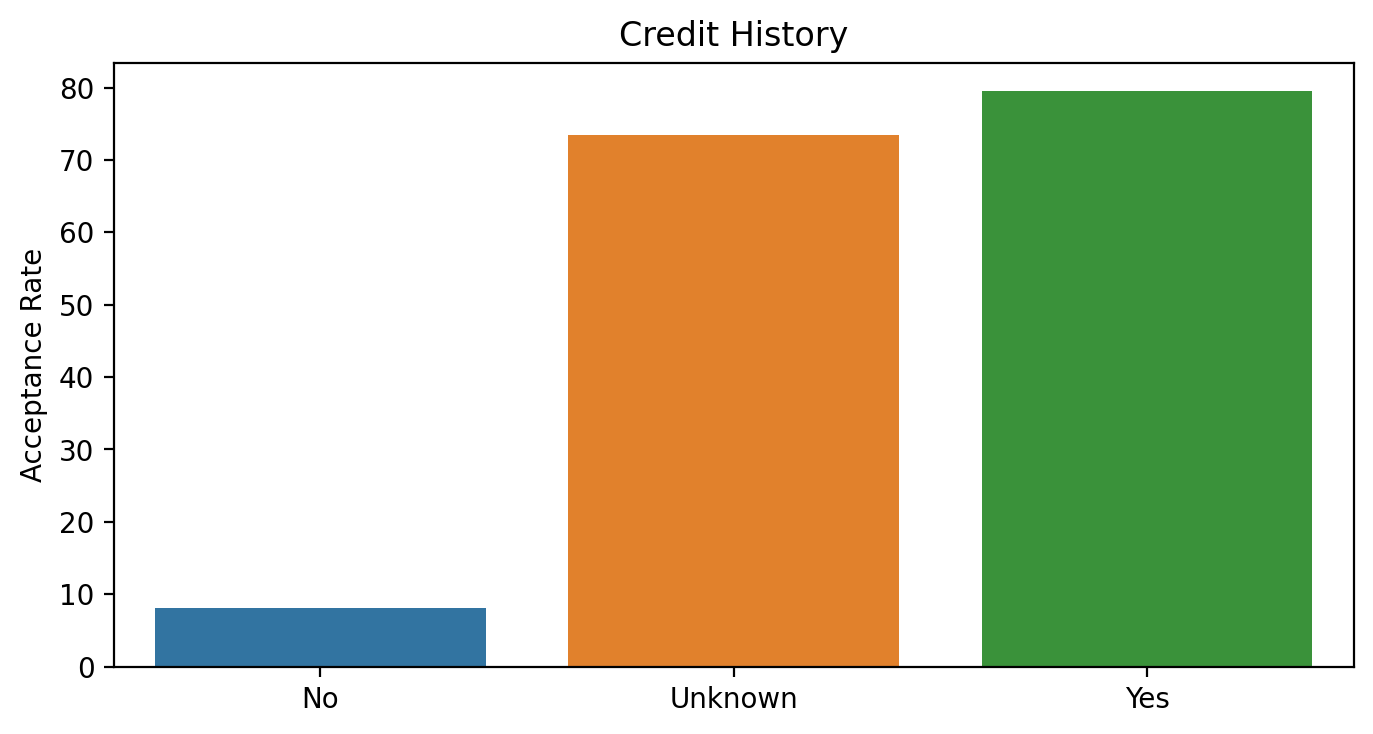

In [60]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.barplot(x=train_df_Credit_History.index.values,
             y=train_df_Credit_History.Loan_Status.values)
plt.ylabel('Acceptance Rate')
plt.title('Credit History')
plt.show()

In [61]:
train_df.Property_Area.value_counts()

Semiurban    225
Urban        198
Rural        175
Name: Property_Area, dtype: int64

In [62]:
train_df_Property_Area = pd.DataFrame(train_df.groupby('Property_Area')['Loan_Status'].mean()*100)
train_df_Property_Area.insert(train_df_Property_Area.shape[1], 'Count', train_df.Property_Area.value_counts().values)
train_df_Property_Area

,Loan_Status,Count
Property_Area,,
Rural,61.714286,225
Semiurban,76.888889,198
Urban,65.656566,175


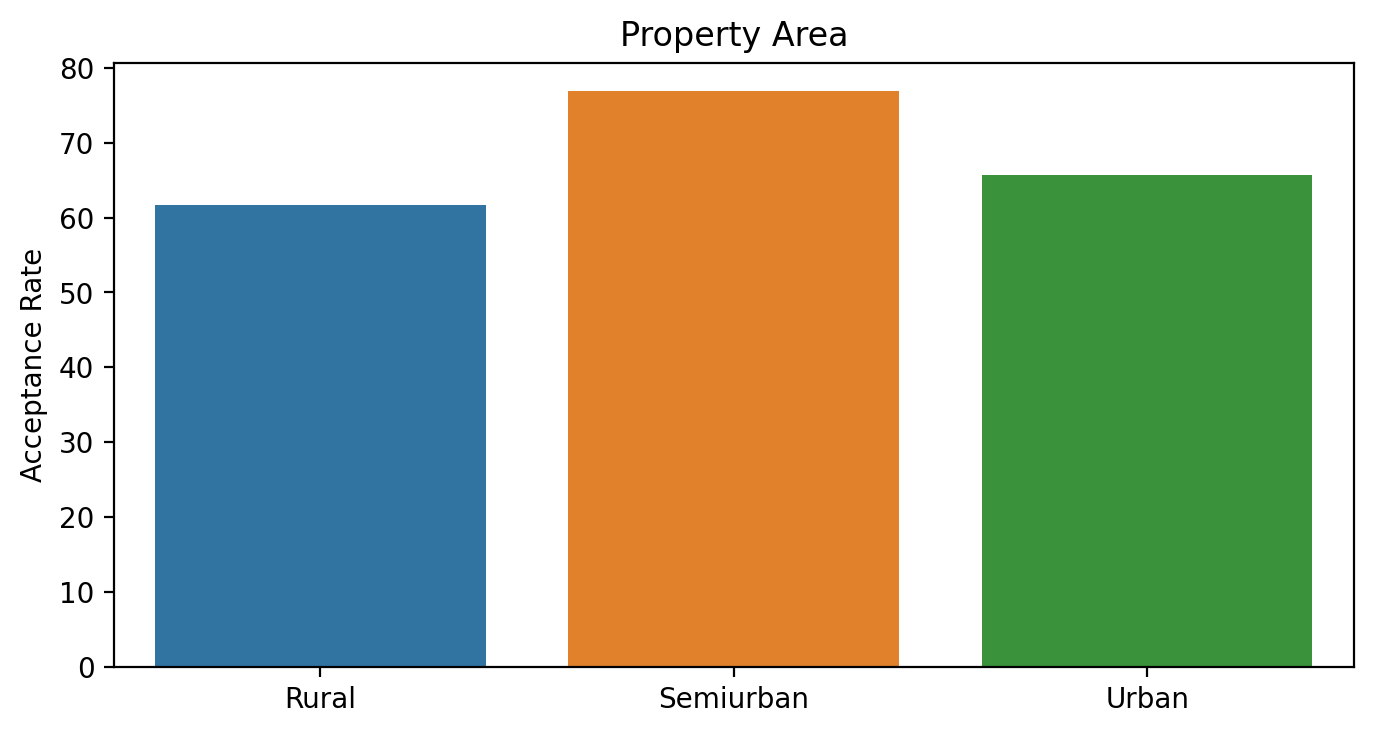

In [63]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.barplot(x=train_df_Property_Area.index.values,
             y=train_df_Property_Area.Loan_Status.values)
plt.ylabel('Acceptance Rate')
plt.title('Property Area')
plt.show()

In [64]:
# EDA

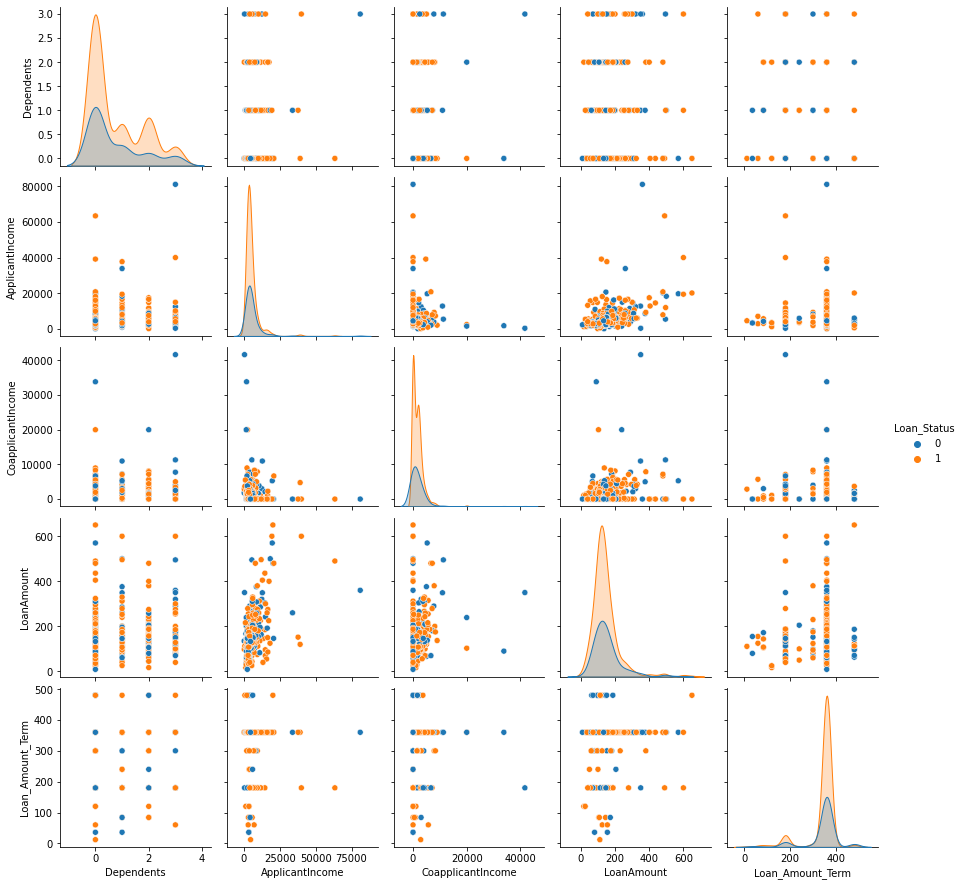

In [65]:
sns.pairplot(train_df, hue ='Loan_Status')
plt.show()

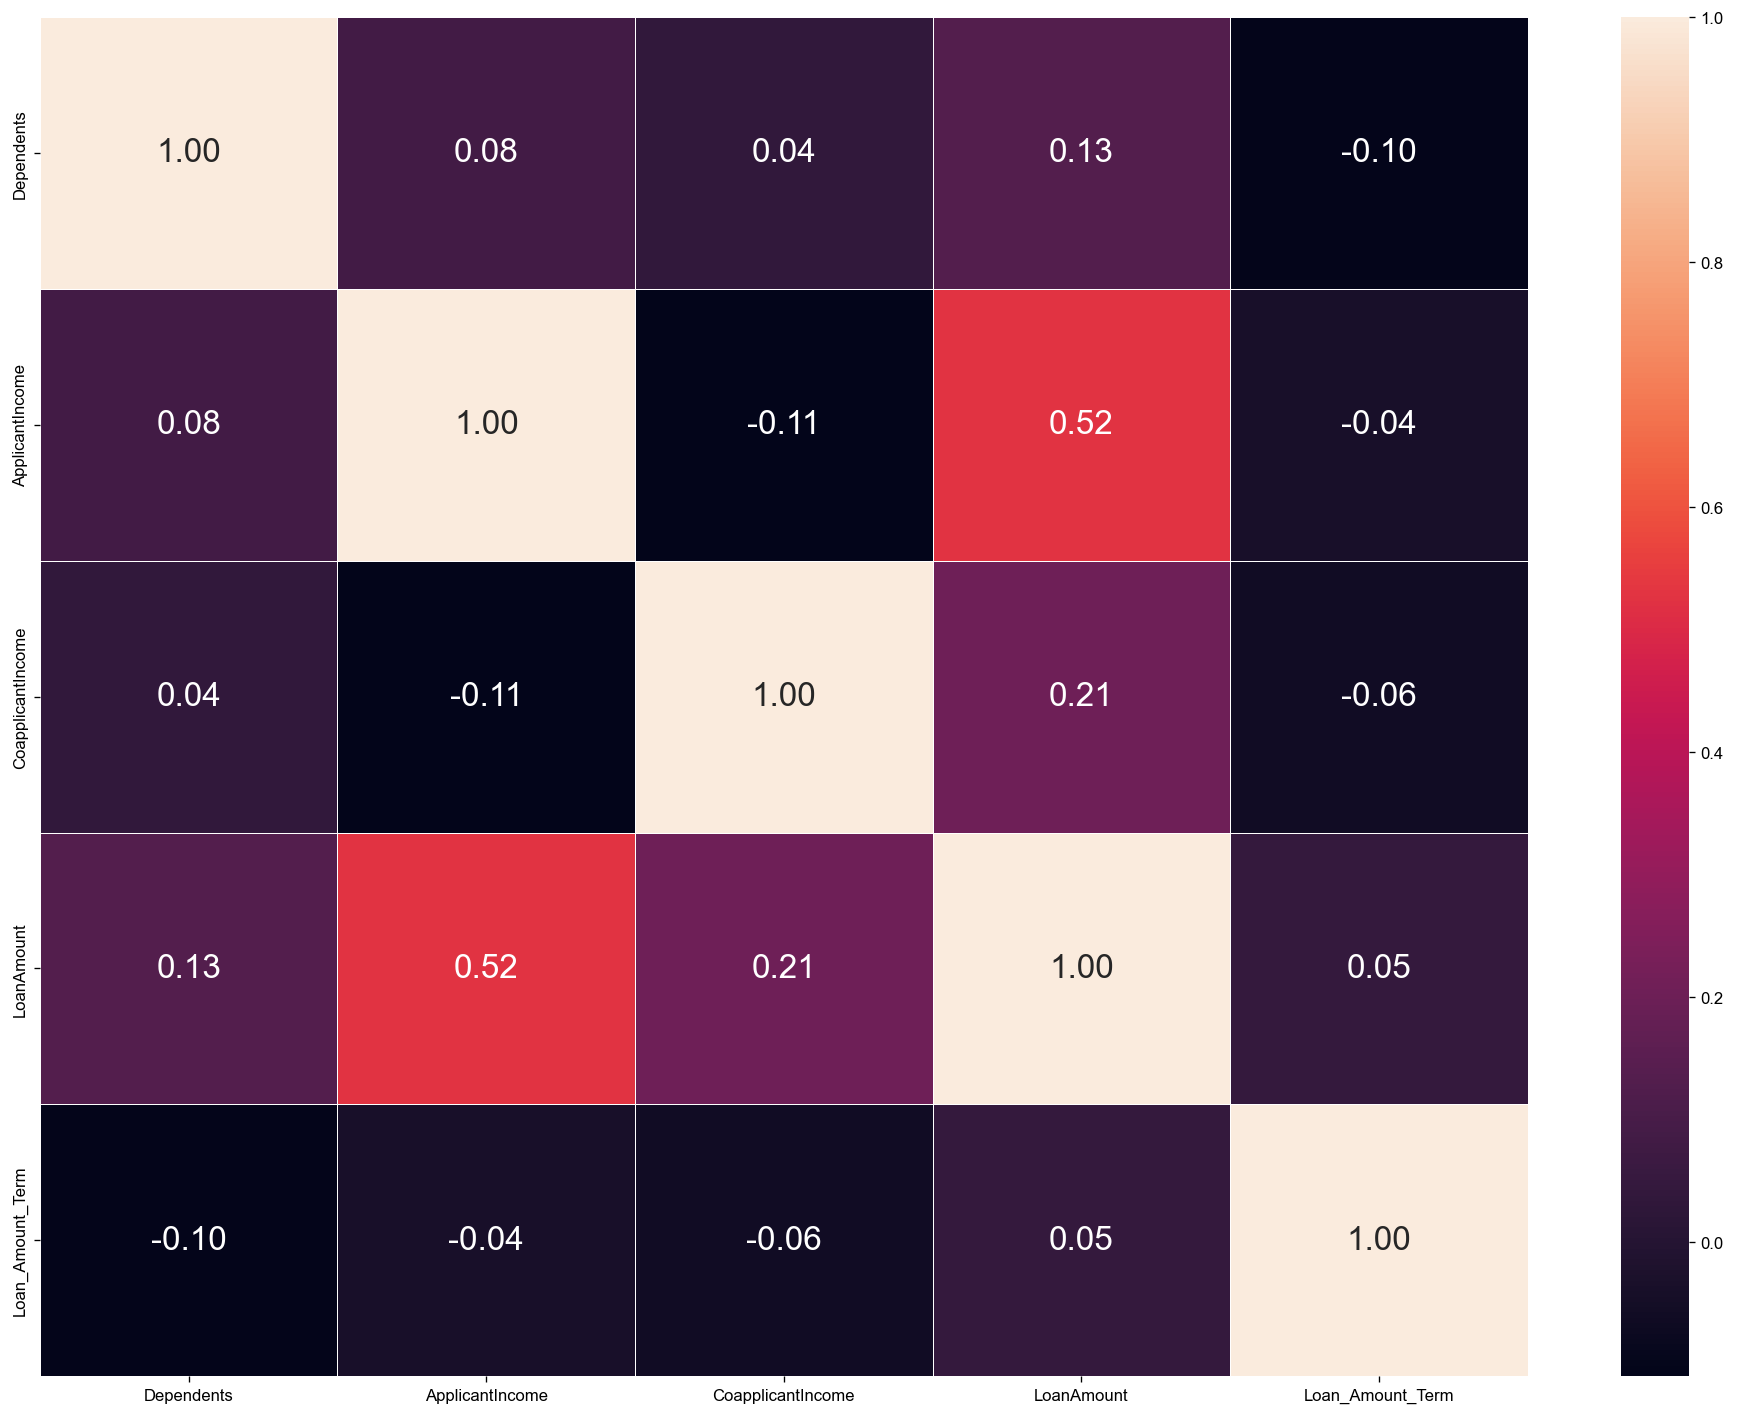

In [66]:
corr_matrix = train_df.drop(['Loan_Status'], axis=1).corr()
fig, ax = plt.subplots(figsize=(20, 15), dpi=120)
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f', 
                 annot_kws={"size": 20})
sns.set(font_scale=2)

In [67]:
# train_df = train_df.drop('Loan_Status', axis=1)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,Yes,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,Yes,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,Yes,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,Yes,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,Yes,Urban,1


In [68]:
train_df.Gender = train_df.Gender.astype(str).str.replace('Male', '0')
train_df.Gender = train_df.Gender.astype(str).str.replace('Female', '1')
train_df.Gender = pd.to_numeric(train_df.Gender)

In [69]:
train_df.Married = train_df.Married.astype(str).str.replace('No', '0')
train_df.Married = train_df.Married.astype(str).str.replace('Yes', '1')
train_df.Married = pd.to_numeric(train_df.Married)

In [70]:
train_df.Self_Employed = train_df.Self_Employed.astype(str).str.replace('No', '0')
train_df.Self_Employed = train_df.Self_Employed.astype(str).str.replace('Yes', '1')
train_df.Self_Employed = train_df.Self_Employed.astype(str).str.replace('Unknown', '2')
train_df.Self_Employed = pd.to_numeric(train_df.Self_Employed)

In [71]:
train_df.Education = train_df.Education.astype(str).str.replace('Not Graduate', '0')
train_df.Education = train_df.Education.astype(str).str.replace('Graduate', '1')
train_df.Education = pd.to_numeric(train_df.Education)

In [72]:
train_df.Credit_History = train_df.Credit_History.astype(str).str.replace('No', '0')
train_df.Credit_History = train_df.Credit_History.astype(str).str.replace('Yes', '1')
train_df.Credit_History = train_df.Credit_History.astype(str).str.replace('Unknown', '2')
train_df.Credit_History = pd.to_numeric(train_df.Credit_History)

In [73]:
train_df.Property_Area = train_df.Property_Area.astype(str).str.replace('Rural', '0')
train_df.Property_Area = train_df.Property_Area.astype(str).str.replace('Urban', '1')
train_df.Property_Area = train_df.Property_Area.astype(str).str.replace('Semiurban', '2')
train_df.Property_Area = pd.to_numeric(train_df.Property_Area)

In [74]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1,1,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1,1,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1,1,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1,1,1


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         598 non-null    int64  
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    int64  
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 76.9 KB


In [76]:
# Stats LR
selected_features = ['Married', 'LoanAmount', 'Credit_History', 'Property_Area']
model = smf.logit("Loan_Status ~ Married  + LoanAmount + Credit_History + Property_Area", train_df[:int(len(train_df)*0.85)]).fit()

print("Model trained")

Optimization terminated successfully.
         Current function value: 0.503777
         Iterations 6
Model trained


In [77]:
model.params

Intercept        -1.683731
Married           0.424187
LoanAmount       -0.003166
Credit_History    2.446486
Property_Area     0.479652
dtype: float64

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  508
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            4
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.1894
Time:                        16:54:39   Log-Likelihood:                -255.92
converged:                       True   LL-Null:                       -315.71
Covariance Type:            nonrobust   LLR p-value:                 6.569e-25
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6837      0.391     -4.308      0.000      -2.450      -0.918
Married            0.4242      0.225      1.887      0.059      -0.016       0.865
LoanAmount        -0.0032      0.001     -2.271      0.023      -0.006      -0.000
Credit_History     2.4465      0.298      8.197      0.000       1.862       3.031
Property_Area      0.4797      0.135      3.556      0.000       0.215       0.744
==================================================================================
"""

In [79]:
threshold = 0.5
y_pred = model.predict(train_df[selected_features][int(len(train_df)*0.85):]) >= threshold

In [80]:
accuracy = np.average(y_pred == train_df.Loan_Status[int(len(train_df)*0.85):])

# Print the evaluation
print(f"The model correctly predicted outcomes {accuracy * 100:.2f}% of time.")

The model correctly predicted outcomes 81.11% of time.


In [81]:
# Calculate log loss
print("Log loss", log_loss(train_df.Loan_Status[int(len(train_df)*0.85):], y_pred))

Log loss 6.5241154786389375


In [82]:
# Calculate what proportion were predicted correctly
guess_was_correct = train_df.Loan_Status == (model.predict(train_df[selected_features]) >= threshold)
accuracy = np.average(guess_was_correct)

# Print the accuracy
print("Accuracy for whole test dataset:", accuracy*100)

Accuracy for whole test dataset: 80.93645484949833
